In [4]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# Import/Read in Files
city_data = "city_data.csv"
ride_data = "ride_data.csv"

In [11]:
# City DataFrame
city_data_df = pd.read_csv(city_data)
city_data_df.head()

# Drop Dupilcates
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [12]:
# Ride DataFrame
ride_data_df = pd.read_csv(ride_data)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [15]:
# Merge DataFrames
pyber_data = pd.merge(city_data_df, ride_data_df, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [17]:
# Calculate Average Fare Per City
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [18]:
# Total Number of Rides Per City
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [19]:
# Total Number of Drivers Per City
total_drivers = pyber_data.groupby("city")["driver_count"].mean()
total_drivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [21]:
# City Type Count (Urban, Suburban, Rural)
city_type = city_data_df.set_index("city")["type"]
city_type.value_counts()

Urban       66
Suburban    41
Rural       18
Name: type, dtype: int64

In [28]:
# New DataFrame
pyber_df = pd.DataFrame({"Average Fare": average_fare,
                        "Number of Rides": total_rides,
                        "Number of Drivers": total_drivers,
                        "City Type": city_type})
pyber_df.head()

,Average Fare,City Type,Number of Drivers,Number of Rides
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [29]:
# Locating Each City
urban = pyber_df.loc[pyber_df["City Type"] == "Urban"]
suburban = pyber_df.loc[pyber_df["City Type"] == "Suburban"]
rural = pyber_df.loc[pyber_df["City Type"] == "Rural"]

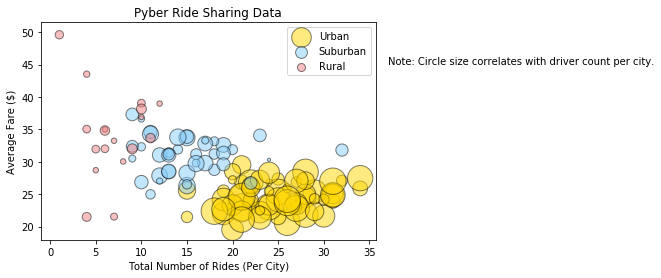

In [91]:
# Create Bubble Plot of Ride Share Data
plt.scatter(urban["Number of Rides"], 
            urban["Average Fare"], 
            color = "gold", 
            edgecolors="black", 
            s = urban["Number of Drivers"]*10, 
            label = "Urban", 
            alpha = 0.5, 
            linewidth = 1)
plt.scatter(suburban["Number of Rides"],
            suburban["Average Fare"], 
            color = "lightskyblue", 
            edgecolors="black", 
            s = suburban["Number of Drivers"]*10, 
            label = "Suburban", 
            alpha = 0.5, 
            linewidth = 1)
plt.scatter(rural["Number of Rides"],
            rural["Average Fare"], 
            color = "lightcoral", 
            edgecolors="black", 
            s = rural["Number of Drivers"]*10, 
            label = "Rural", 
            alpha = 0.5, 
            linewidth = 1)

# Graph Formatting
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="best")
plt.text(37, 45,"Note: Circle size correlates with driver count per city.")
plt.show()


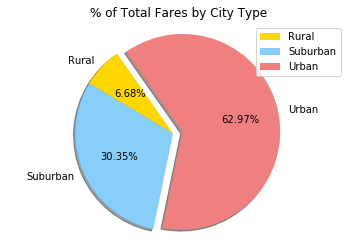

In [93]:
# Percentage of Total Fares by City Type
city_fares = pyber_data.groupby(["type"])["fare"].sum()

# Create Pie Chart
plt.pie(city_fares, 
        labels = city_fares.index, 
        autopct = "%1.2f%%", 
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = (0,0,.1), 
        shadow = True, 
        startangle = 125)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.legend(loc= "best")
plt.show()


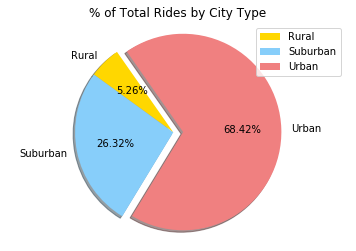

In [94]:
# Percentage of Total Rides by City Type
city_rides = pyber_data.groupby(["type"])["ride_id"].count()

# Create Pie Chart
plt.pie(city_rides, 
        labels = city_rides.index, 
        autopct = "%1.2f%%", 
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = (0,0,.1), 
        shadow = True, 
        startangle = 125)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.legend(loc= "best")
plt.show()

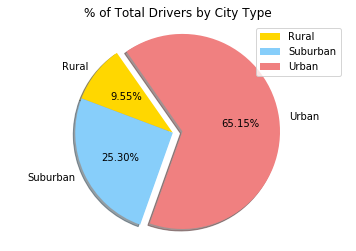

In [95]:
# Percentage of Total Drivers by City Type
city_drivers = pyber_data.groupby(["type"])["driver_count"].mean()

# Create Pie Chart
plt.pie(city_drivers, 
        labels = city_drivers.index, 
        autopct = "%1.2f%%", 
        colors = ["gold", "lightskyblue", "lightcoral"], 
        explode = (0,0,.1), 
        shadow = True, 
        startangle = 125)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.legend(loc= "best")
plt.show()